<a href="https://colab.research.google.com/github/Jayveersinh-Raj/Neural_Networks_Classification/blob/main/Neural_Networks_Classification_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification wih TensorFlow
We'll write neural networks for classifications

A classification is where one tries to classify something as one thing or another. Types of classification:
1. Binary classification
2. Multiclass classification
3. Multilabel classification

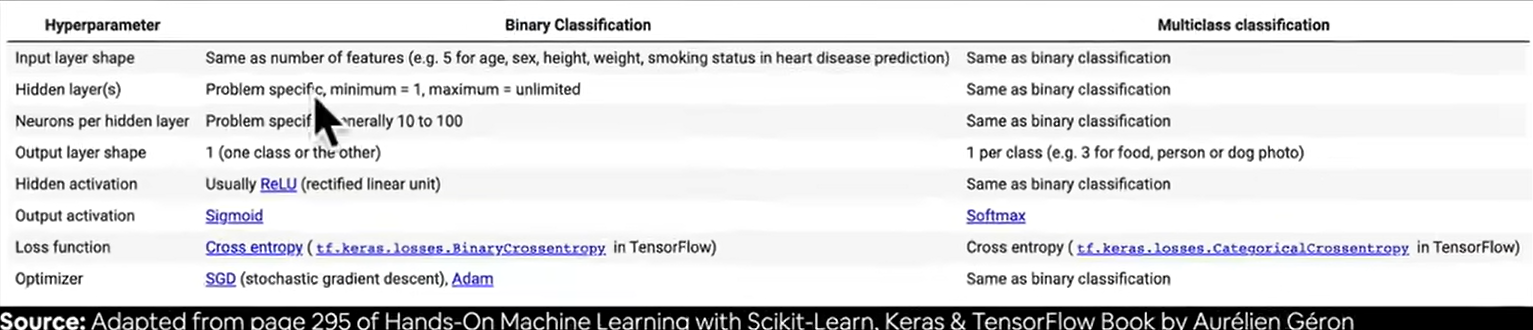

* More multilabel, you can use cross entropy, and everything else could be same. Output layers would be 1 per class or label

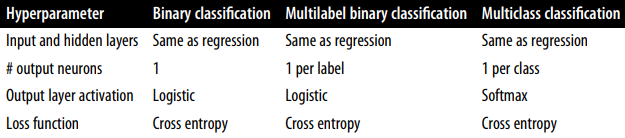



# Creating data to view and fit

In [145]:
# Lets practice on some toy data before moving to bigger/actual problem
from sklearn.datasets import make_circles # a toy dataset for clustering and classification according to documentation

# lets make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42) # noise = 0.03 mean 3% of noisy data  


In [146]:
# Lets check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [147]:
# labels
y[:10] # Lets just check first 10

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

As we see there is only 1 or 0, single output with only either of 2 output. It is a **Binary Classification**

Remeber visualisation is important to undersand our data. It is obviously hard to understand what it is

In [148]:
# Lets visualize in a table form
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y}) # X0 is column 0, X1 is column 1 and label is the last
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


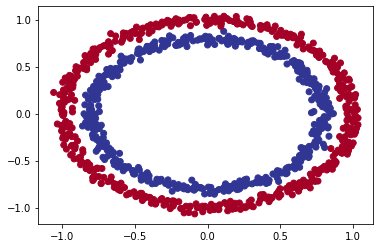

In [149]:
# Now lets visualize as a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c = y, cmap = plt.cm.RdYlBu) # Red blue colour for our X0, X1
# first axis would have X0, second would have X1 with all data

In [150]:
# Now, it can be deduced what we want to find here, weather it would be in blue or red, X0 would be red, and X1 would be blue


# Input/Output shapes

In [151]:
# Checking shapes is important first, since we might need to change the shape later on
X.shape, y.shape

((1000, 2), (1000,))

In [152]:
# Length is 1000, we can see that by our first number in shape
# Lets see just the first example to have the idea
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

Hmm, so we give 2 numbers, or 2d coordinates of (x,y) and get an output or label i.e. 0 or 1

# Steps in modelling
The steps in modeeling with TensorFlow are typically:
1. Create/import the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Go to 4...

In [153]:
# Lets create our model according to the typical model pictures above
import tensorflow as tf
tf.random.set_seed(42) # The random seed for reproducibilty

# 1. Create the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), # Must use brackets() or will throw type error
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"]) # Accuracy is in % ex. 0.40 means 40%
#tf.size(X)
#X = tf.constant(X, dtype = tf.float32)
#y = tf.constant([y], dtype = tf.float32)
# 3. Fit the model
model.fit(tf.cast(X, dtype = tf.float32), tf.cast(y, dtype = tf.int32), epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


So according to the above epochs (the last epoch especially) only 48% predictions are correct or iti= is just 48% correct. Meaning out of hundred it could get only 48% right

In [154]:
# Lets train our model for longer to improve
model.fit(X, y, epochs = 200, verbose = 0)
model.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Hmm, so it just got 50% accuracy, not good. It's like it is guessing since there is only 1 or 0 (red or blue circle)

In [155]:
# Lets try to add extra layer and try everythibg we learned to tune the hyperparameters
tf.random.set_seed(42)
# 1. Create the model with 2 layers
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"])

# Fit
model.fit(X, y, epochs = 100, verbose = 0)
model.evaluate(X, y) # We evaluate on test data, but for this naive example it is okay

32/32 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

It is guessing, we can see that using** value_counts **to see how many labels we have. 

**Note:** This is a pandas feature after creating a table using pd.DataFrame

* Remember we use this same pd.DataFrame(history.history).plot()  to plot the loss curve, where history = model.fit(...)


In [156]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

# Improving the model
Some tricks to tune the hyperparamaters to improve our model.

1. While model creating : Add more layers or increase the number of hidden units. Or changing activation function.

2. While compling : Choosing different optimization function such as Adam() insated of SGD(), and their learning rates

3. While fitting: trainging for longer, i.e. increasing epochs

In [157]:
# Lets try tuning our model to get as high accuracy as possible
tf.random.set_seed(42)  # Random seed

# 1. Creating the model, we already tried 2 layers, lets try more than 2 now
model_improved = tf.keras.Sequential([
              tf.keras.layers.Dense(100),
              tf.keras.layers.Dense(10),
              tf.keras.layers.Dense(1)
])

# 2. Compile
model_improved.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"]) # is the standard baseline, may not be the best for a problem, we'll see later

# 3. Fitting
model_improved.fit(X, y, epochs = 100, verbose = 0)

# Evaluate
model_improved.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

Tried some things, but always shows 0.5, lets plot to visualize whats happening

# Plotting function to visualize the predictions with actual values
1. Take in trained model, features (X) and labels (y)
2. Create a meshgrid of different X values
3. Make predictions across the meshgrid
4. Plot the predictions as well as a line between the zomes (where each unique class falls)

In [158]:
# Lets code what we said above
# Function for that
import numpy as np
import matplotlib.pyplot as plt

  # Plots the decision boundary created by a model predicting on X.
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
 x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
 y_min, y_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
  # This are just the boundaries, the lowest and the highest

  # Read about numpy meshgrids to know more

 xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we are going to make predictions on these)
 x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
 y_pred = model.predict(x_in)

  # Check for multi-class
 if len(y_pred[0]) > 1:
    print("It is multiclass")
    # We will have to reshape our prediction to get them ready for plot
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape) #
 else:
    print("It is binary")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the boundary
 plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
 plt.scatter(X[:, 0], X[:,1], c= y, cmap = plt.cm.RdYlBu)
 plt.xlim(xx.min(), xx.max())
 plt.ylim(yy.min(), yy.max())

🔑 The above function was inspired by :
1. https://cs231n.github.io/neural-networks-case-study/
2. https://github.com/GokuMohandas/MadeWithML

It is binary


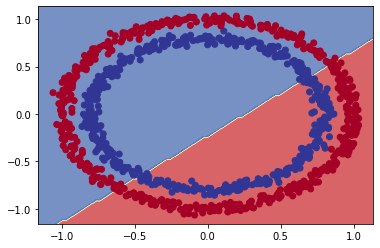

In [159]:
plot_decision_boundary(model_improved, X, y)

Hmm..., it looks like it is drawing straight lines, i.e. regression, but our data is non linear/circular

In [160]:
# Lets check the model we build for above works with linear data
X_lin = tf.range(0, 500, 1)
y_lin = tf.range(500, 1000, 1)
# y = x + 500
# X_lin, y_lin

#Divide training and test set 80-20%
X_train = X_lin[:400]

# Minimum ndim should be 2
# X_train.shape
X_train = tf.reshape(X_train, (400, 1)) # Total is 400 so it should be 400*1 = 400, check with above X_train.shape
y_train = tf.reshape(X_train, (400, 1)) # 1 row with 1 numbers/columns
# 400, 1 and not 1, 400 because we need to predict 1 value for 1 value, 1, 400 would mean 1 element/row with 400 features

# test set
X_test = X_lin[400 : ]
y_test = y_lin[400 : ]

# Minimun 2 dimensions
X_test = tf.reshape(X_test, (100 , 1)) # Remember 1st index is row and 2nd is column, so 1 row 1 elements/columns and 100 such i.e. 20% of 500
y_test = tf.reshape(y_test, (100, 1)) # 100, 1 and not 1, 100 because 1, 100 would mean 100 features and 1 element with those features

# X_test.shape, X_train.shape, y_test.shape, y_train.shape
y_train = y_lin[:400] # The training set of y

In [161]:
# Lets see if we can fit this to the model we have above
model.fit(X_lin, y_lin, epochs = 100, verbose = 0)

ValueError: ignored

Oh!! seems like we cannot fit it. 
The reason being, we used BinaryCrossentropy() for losses and our y_lin has not binary data

In [213]:
# Lets change the model so it can fit the regression data with losses = mae, because y does not have binary data
tf.random.set_seed(42)

# 1. Create the model
model_lin = tf.keras.Sequential([
          tf.keras.layers.Dense(5, activation = None),
           tf.keras.layers.Dense(5, activation = None),
          tf.keras.layers.Dense(1, activation = None)
])

# 2. Compile the model
model_lin.compile(loss = tf.keras.losses.mae, # Note we changed from BinaryCrossentropy to mae, i.e. regression compatible loss
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                  metrics = ["mae"])

# 3. Fitting
model_lin.fit(X_train,  y_train, epochs = 200, verbose = 0)

In [214]:
# lets predict for X_test
y_pred = model_lin.predict(X_test)

In [171]:
# Now lets visualize
import itertools
def visualize(X_train, X_test, y_train, y_test, y_pred ):
  plt.figure(figsize = (10,10))
  plt.plot(X_train, y_train, c = 'b')
  plt.plot(X_test, y_test, c = 'g')
  plt.plot(X_test, y_pred, c = 'r')

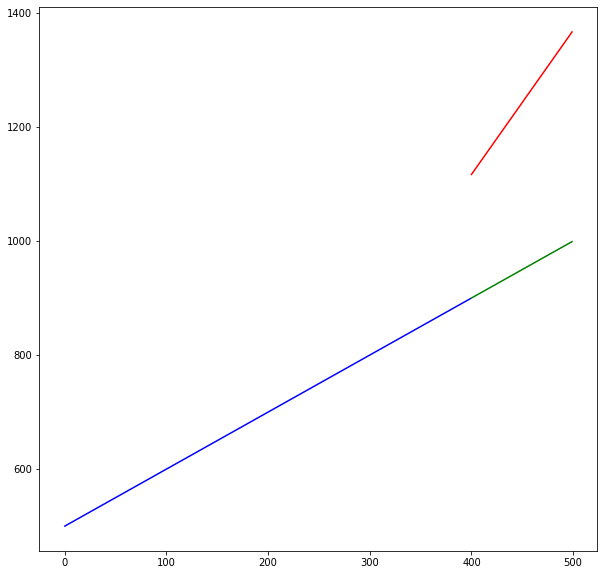

In [173]:
visualize(X_train, X_test, y_train, y_test, y_pred)

In [172]:
# lets evaluate the model
model_lin.evaluate(X_test, y_test)

4/4 [==============================] - 0s 5ms/step - loss: 292.2690 - mae: 292.2690


[292.2689514160156, 292.2689514160156]

That's alot, lets tune the hyperparameters of the above model, and plot again

In [216]:
model_lin.evaluate(X_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 27.8421 - mae: 27.8421


[27.842052459716797, 27.842052459716797]

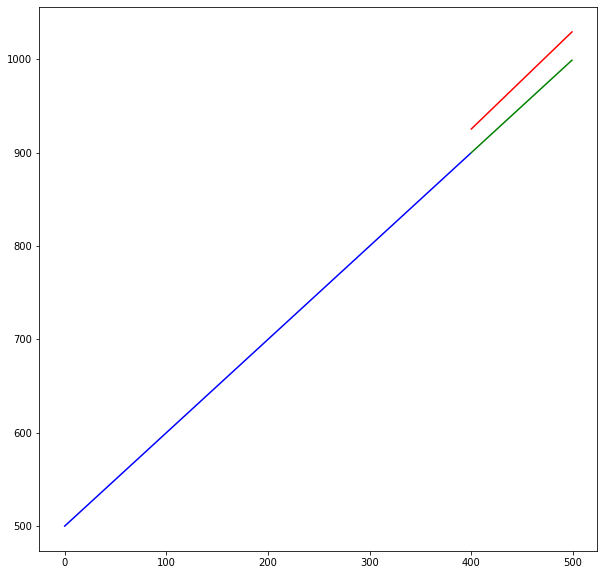

In [215]:
visualize (X_train, X_test, y_train, y_test, y_pred)

Now it is much better, 27 is very smaller and insignifanct to 500. From 200 mae to 27 is a really good improvement